In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Style matplotlib

In [2]:
for style in plt.style.available:
    print(style)

Solarize_Light2
_classic_test_patch
_mpl-gallery
_mpl-gallery-nogrid
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn-v0_8
seaborn-v0_8-bright
seaborn-v0_8-colorblind
seaborn-v0_8-dark
seaborn-v0_8-dark-palette
seaborn-v0_8-darkgrid
seaborn-v0_8-deep
seaborn-v0_8-muted
seaborn-v0_8-notebook
seaborn-v0_8-paper
seaborn-v0_8-pastel
seaborn-v0_8-poster
seaborn-v0_8-talk
seaborn-v0_8-ticks
seaborn-v0_8-white
seaborn-v0_8-whitegrid
tableau-colorblind10


In [3]:
# Set style
plt.style.use('bmh')

# I) Import data

In [4]:
data = pd.read_csv('Shopping_data.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# II) Check all data

<BarContainer object of 2 artists>

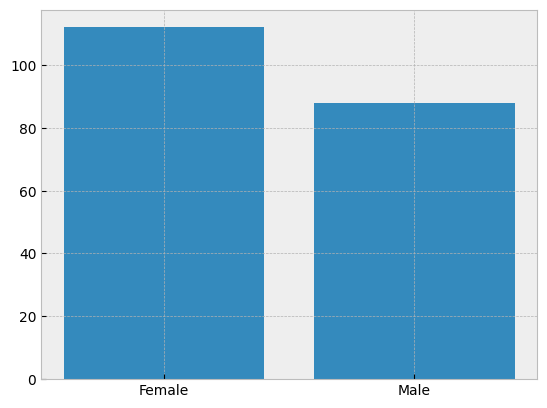

In [5]:
# Bar Gender
count_gender = np.unique(data["Genre"], return_counts=True)
plt.bar(count_gender[0], count_gender[1])

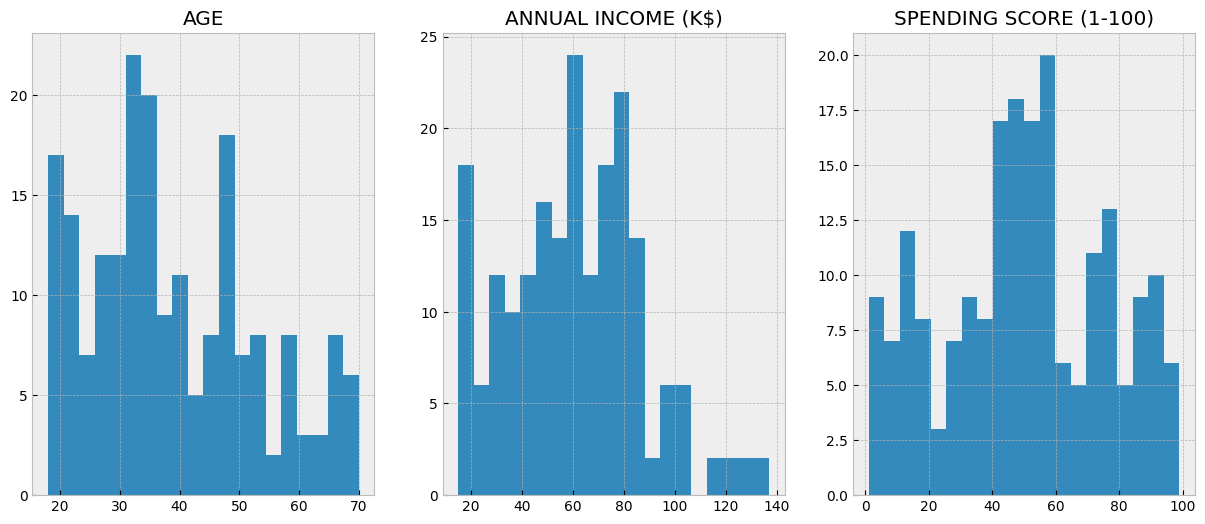

In [6]:
count = 1
count_bool = False

plt.figure(figsize=(15, 6))

for col in data.columns:
    if col == 'Age':
        count_bool = True
    if count_bool:
        plt.subplot(1,3, count)
        plt.hist(data[col], bins=20)
        plt.title(col.upper())
        count += 1

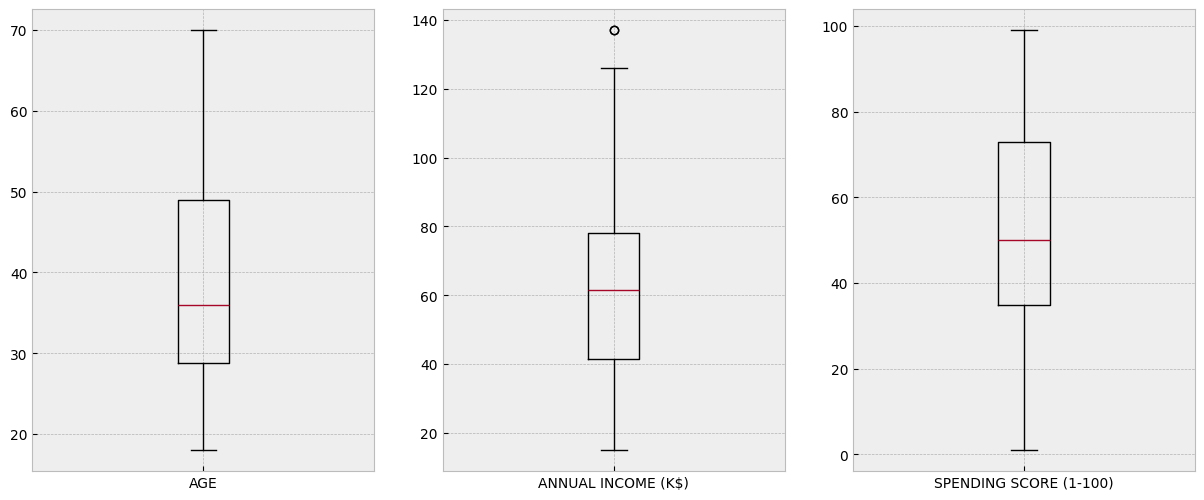

In [7]:
count = 1
count_bool = False

plt.figure(figsize=(15, 6))

for col in data.columns:
    if col == 'Age':
        count_bool = True
    if count_bool:
        plt.subplot(1,3, count)
        plt.boxplot(data[col])
        plt.xticks([1], [col.upper()])
        count += 1

# III) Using Income to Clustering

Text(0, 0.5, 'Income')

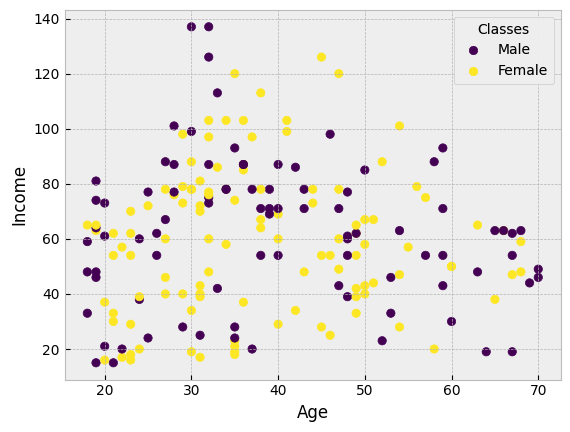

In [8]:
colors = pd.get_dummies(data['Genre'])['Female']

fig, ax = plt.subplots()

scatter = ax.scatter(data['Age'], data['Annual Income (k$)'], c=colors)

legend = ax.legend(*scatter.legend_elements(), loc="best", title="Classes")
legend.get_texts()[0].set_text('Male')
legend.get_texts()[1].set_text('Female')

ax.add_artist(legend)
ax.set_xlabel("Age")
ax.set_ylabel("Income")

You can see.

When you are young, between the ages of 25 and 50. This is the best time to MAKE MONEY. 

Text(0, 0.5, 'Spending Score')

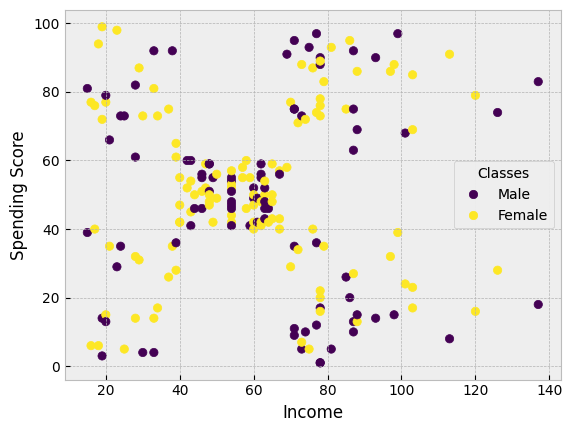

In [9]:
colors = pd.get_dummies(data['Genre'])['Female']

fig, ax = plt.subplots()

scatter = ax.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=colors)

legend = ax.legend(*scatter.legend_elements(), loc="best", title="Classes")
legend.get_texts()[0].set_text('Male')
legend.get_texts()[1].set_text('Female')

ax.add_artist(legend)
ax.set_xlabel("Income")
ax.set_ylabel("Spending Score")

Text(0, 0.5, 'Spending Score')

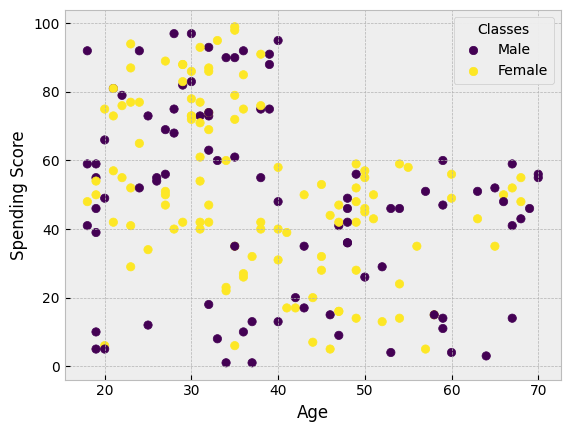

In [10]:
colors = pd.get_dummies(data['Genre'])['Female']

fig, ax = plt.subplots()

scatter = ax.scatter(data['Age'], data['Spending Score (1-100)'], c=colors)

legend = ax.legend(*scatter.legend_elements(), loc="best", title="Classes")
legend.get_texts()[0].set_text('Male')
legend.get_texts()[1].set_text('Female')

ax.add_artist(legend)
ax.set_xlabel("Age")
ax.set_ylabel("Spending Score")

Young people spend more money on shopping

# IV) Predict Spending Score

In [11]:
gender = pd.get_dummies(data['Genre'])["Female"].astype('float32')
value = data[['Age', 'Annual Income (k$)']].astype('float32')

data_train = pd.concat([gender, value], axis=1)
target = data["Spending Score (1-100)"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data_train, target, test_size=0.1, random_state=2024)

In [13]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(180, 3) (180,)
(20, 3) (20,)


### 4.1) Decision Trees

In [14]:
deep = []
mse_tree_list = []
for i in range(1, 100+1):
    clf = tree.DecisionTreeRegressor(max_depth=i)
    clf = clf.fit(x_train, y_train)
    result_tree = clf.predict(x_test)
    mse_tree = mean_squared_error(y_test, result_tree)
    mse_tree_list.append(mse_tree)
    deep.append(i)

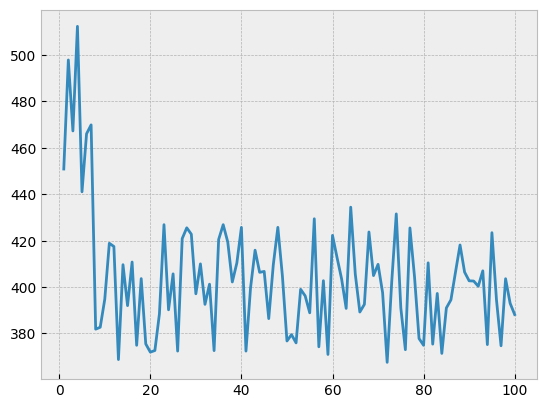

In [15]:
plt.plot(deep, mse_tree_list)

### 4.2) Linear

In [16]:
reg = LinearRegression().fit(x_train, y_train)
result_linear = reg.predict(x_test)
mse_linear = mean_squared_error(y_test, result_linear)
mse_linear

481.99992159287723

#### Sumarary

In [17]:
method = ["DecisionTreeRegressor", "LinearRegression"]
mse = [np.min(mse_tree_list), mse_linear]

table = pd.DataFrame({
    "Method": method,
    "MSE": mse
})

display(table)

,Method,MSE
0,DecisionTreeRegressor,367.512500
1,LinearRegression,481.999922
